Steps followed
<ul> 1).Problem Statement</ul>
<ul> 2).Hypothesis Generation</ul>
<ul> 3).Loading Packages and Data</ul>
<ul> 4).Data Structure and Content</ul>
<ul> 5).Exploratory Data Analysis</ul>
<ul> 6).Univariate Analysis</ul>
<ul> 7).Bivariate Analysis</ul>
<ul> 8).Missing Value Treatment</ul>
<ul> 9).Feature Engineering</ul>
<ul> 10).Encoding Categorical Variables</ul>
<ul> 11).Label Encoding</ul>
<ul> 12).One Hot Encoding</ul>
<ul> 13).PreProcessing Data</ul>
<ul> 14).Modeling</ul>
<ul> 15).Linear Regression</ul>
<ul> 16).Regularized Linear Regression</ul>
<ul> 17).RandomForest</ul>
<ul> 18).XGBoost</ul>
<ul> 19).Summary</ul>

### Loading Packages

In [2]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings   # To ignore any warnings 
warnings.filterwarnings("ignore")

### Reading Data

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/codeofelango/ineuronproject_storesales/main/Train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/codeofelango/ineuronproject_storesales/main/Test.csv')

In [4]:
train.shape,test.shape

((8523, 12), (5681, 11))

Let’s make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [5]:
train_original=train.copy() 
test_original=test.copy()

### Features of Data
We will take a quick glance over the feature names of train and test datasets.

In [6]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

(None, None)

As we can see, there are 4 numeric and 7 categorical variables.



We need to predict Item_Outlet_Sales for given test data

lets first merge the train and test data for Exploratory Data Analysis



In [8]:
train['source'] = 'train'
# test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [9]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

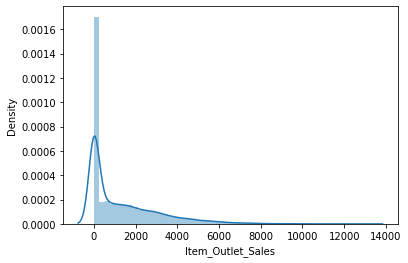

In [10]:
sns.distplot(data['Item_Outlet_Sales'])

In [12]:
print('Skewness: %f' % data['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %data['Item_Outlet_Sales'].kurt())

Skewness: 1.544684
Kurtsis: 2.419439


In [13]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


In [14]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [15]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

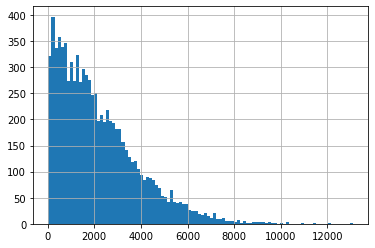

In [16]:
train['Item_Outlet_Sales'].hist(bins = 100);

As you can see, it is a right skewd variable and would need some data transformation to treat its skewness.

### Independent Variables (numeric variables)
Now let’s check the numeric independent variables. We’ll again use the histograms for visualizations because that will help us in visualizing the distribution of the variables.

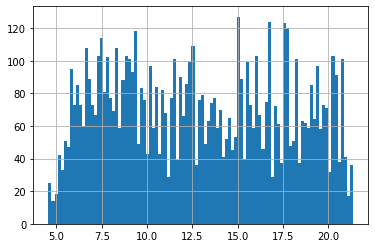

In [17]:
train['Item_Weight'].hist(bins = 100);

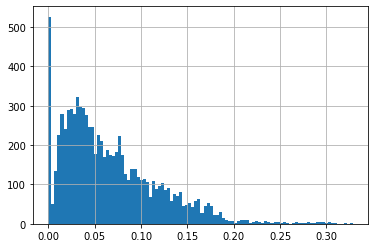

In [18]:
train['Item_Visibility'].hist(bins = 100)

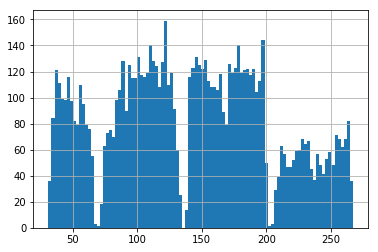

In [ ]:
train['Item_MRP'].hist(bins = 100)

#### Observations

There seems to be no clear-cut pattern in Item_Weight.
Item_Visibility is right-skewed and should be transformed to curb its skewness.
We can clearly see 4 different distributions for Item_MRP. It is an interesting insight.

### Independent Variables (categorical variables)

Now we’ll try to explore and gain some insights from the categorical variables. A categorical variable or feature can have only a finite set of values. Let’s first plot Item_Fat_Content.

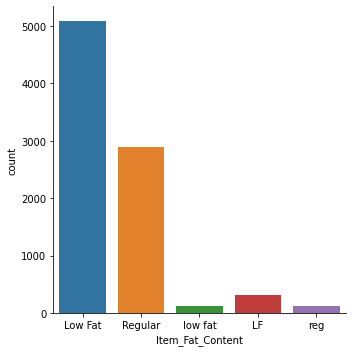

In [19]:
import seaborn as sns
sns.catplot(x="Item_Fat_Content", kind="count", data=train);

In the figure above, ‘LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one. Similarly we can be done for ‘reg’ and ‘Regular’ into one. After making these corrections we’ll plot the same figure again.

In [20]:
train['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

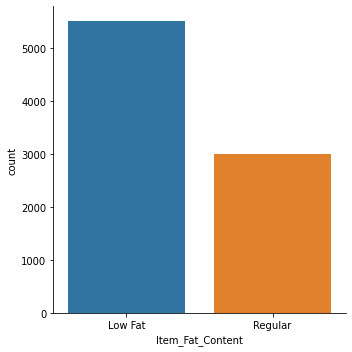

In [21]:
sns.catplot('Item_Fat_Content',kind = 'count',data = train)

### Now lets check other categorical variables

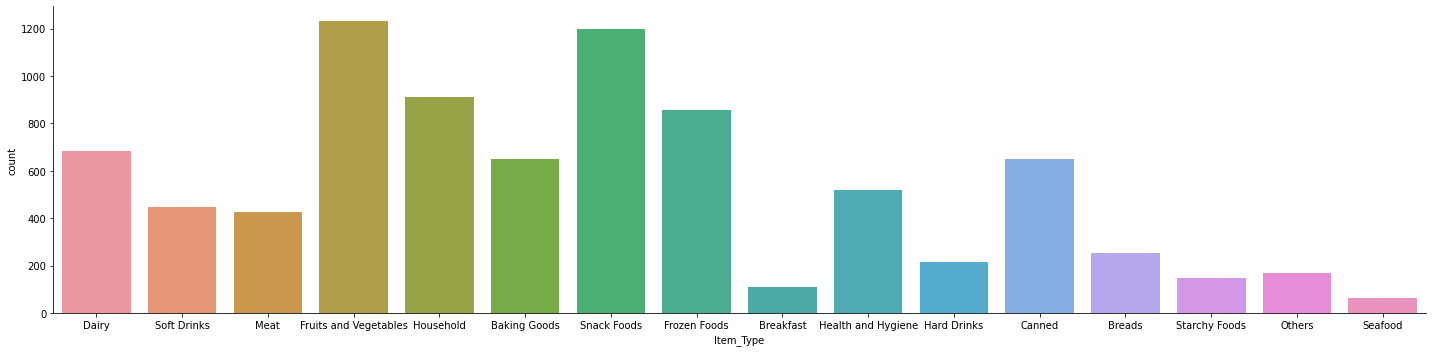

In [22]:
sns.catplot('Item_Type',kind = 'count',data = train,aspect =4)

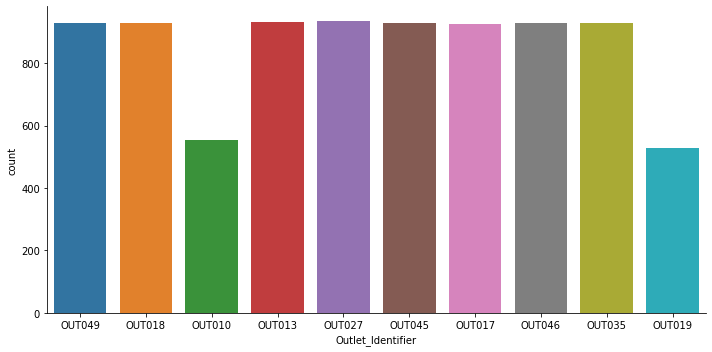

In [23]:
sns.catplot('Outlet_Identifier',kind = 'count',data = train,aspect = 2)

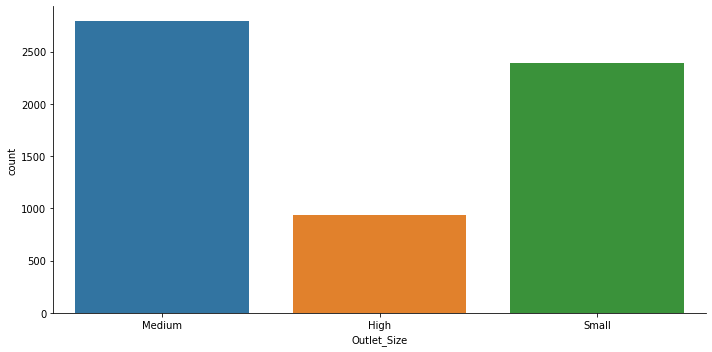

In [25]:
sns.catplot('Outlet_Size',kind = 'count',data = train,aspect = 2)

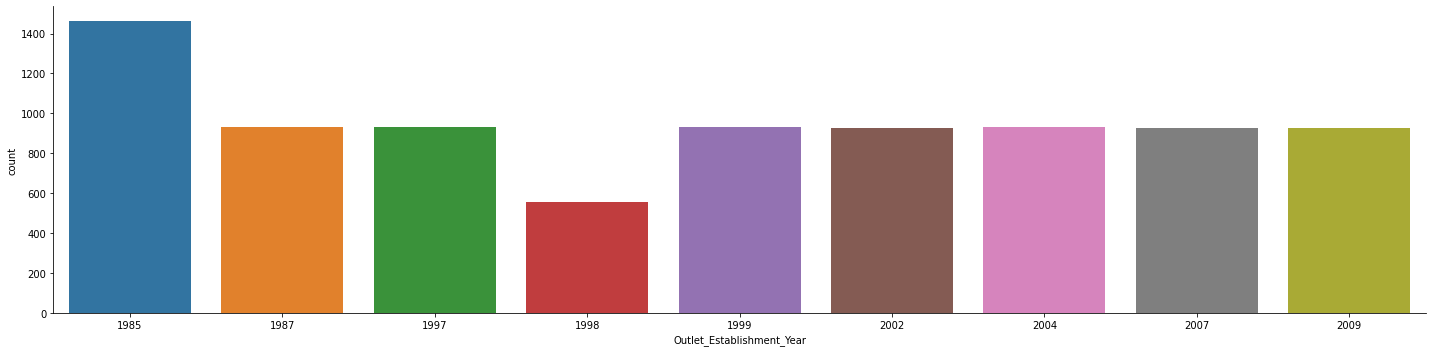

In [26]:
sns.catplot('Outlet_Establishment_Year',kind = 'count',data = train,aspect =4)

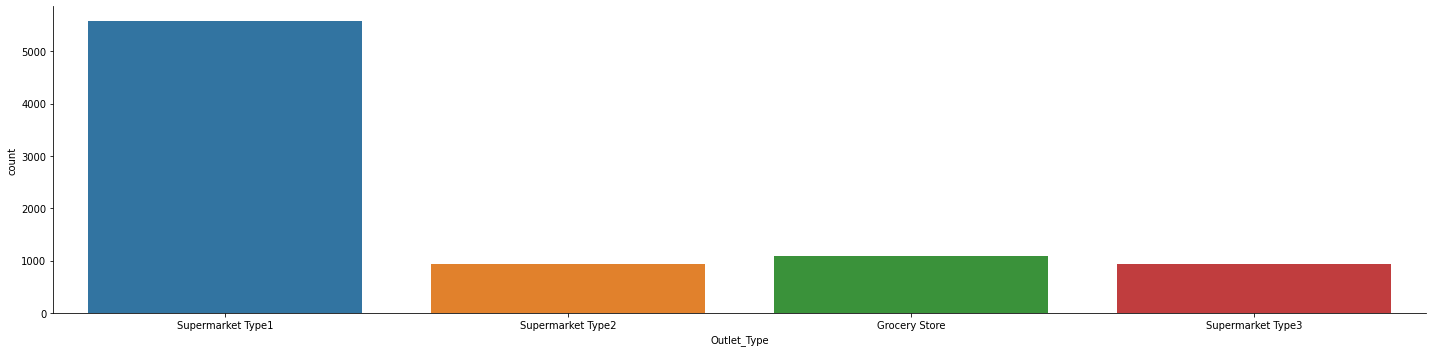

In [27]:
sns.catplot('Outlet_Type',kind = 'count',data = train,aspect =4)

### Observations

Lesser number of observations in the data for the outlets established in the year 1998 as compared to the other years.
Supermarket Type 1 seems to be the most popular category of Outlet_Type.


### Target Variable vs Independent Numerical Variables

##### After looking at every feature individually, let’s now do some bivariate analysis. Here we’ll explore the independent variables with respect to the target variable. The objective is to discover hidden relationships between the independent variable and the target variable and use those findings in missing data imputation and feature engineering in the next module.

##### We will make use of scatter plots for the continuous or numeric variables and violin plots for the categorical variables.



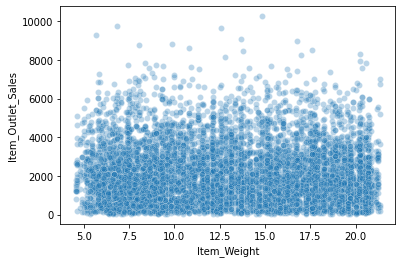

In [28]:
sns.scatterplot(x = 'Item_Weight',y = 'Item_Outlet_Sales',data = train,alpha = 0.3);

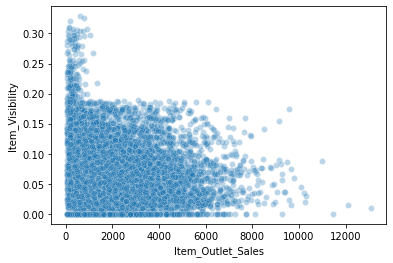

In [29]:
sns.scatterplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = train,alpha = 0.3)

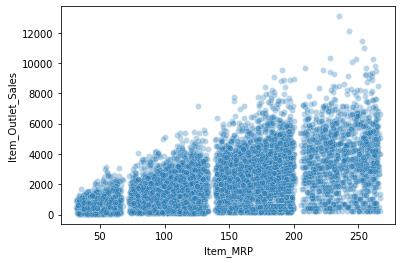

In [30]:
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = train,alpha = 0.3)

### Observations

Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.
In Item_Visibility vs Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero. We will take note of this issue and deal with it in the later stages.
In the third plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.


### Target Variable vs Independent Categorical Variables

Now we’ll visualise the categorical variables with respect to Item_Outlet_Sales. We will try to check the distribution of the target variable across all the categories of each of the categorical variable.

We could have used boxplots here, but instead we’ll use the violin plots as they show the full distribution of the data. The width of a violin plot at a particular level indicates the concentration or density of data at that level. The height of a violin tells us about the range of the target variable values.

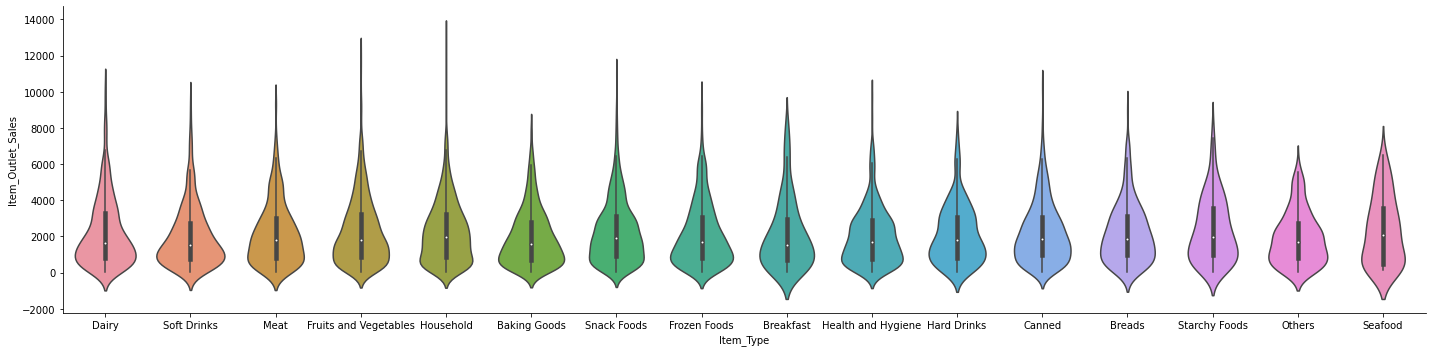

In [31]:
sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',kind = 'violin',data = train,aspect=4)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

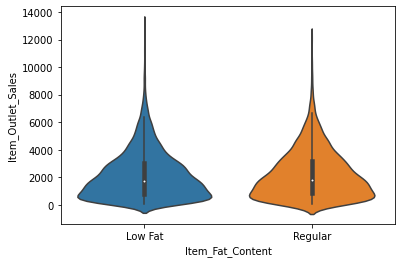

In [33]:
sns.violinplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',data = train)

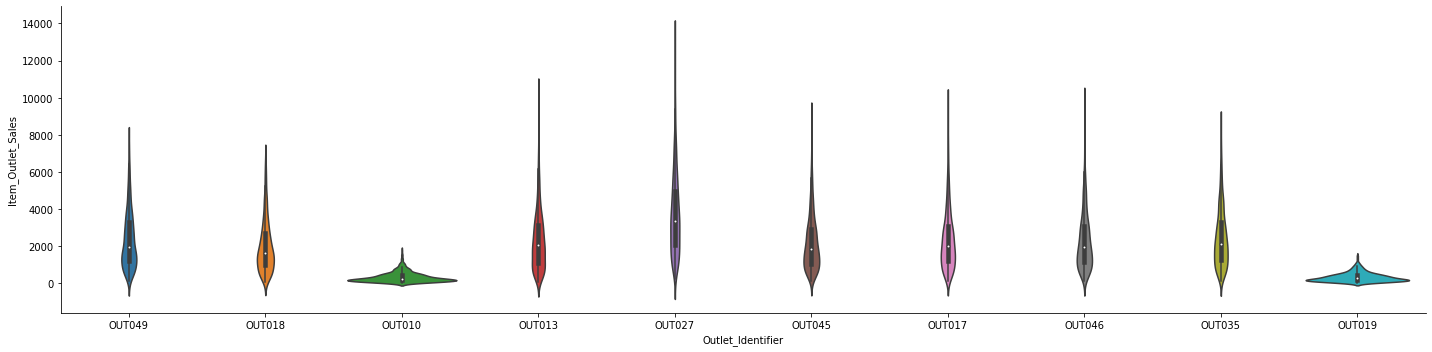

In [35]:
sns.catplot('Outlet_Identifier','Item_Outlet_Sales',kind = 'violin',data = train,aspect = 4)

### Observations

<ul><li>Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct and same is the case with Item_Fat_Content.</li>
<li>The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.</li></ul>

In the univariate analysis let’s check the distribution of the target variable across Outlet_Size.

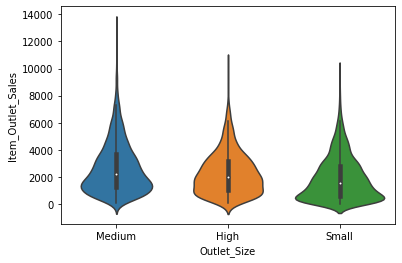

In [36]:
sns.violinplot('Outlet_Size','Item_Outlet_Sales',data = train)

Let’s examine the remaining variables.

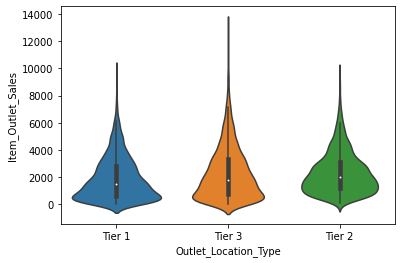

In [37]:
sns.violinplot('Outlet_Location_Type','Item_Outlet_Sales',data = train)

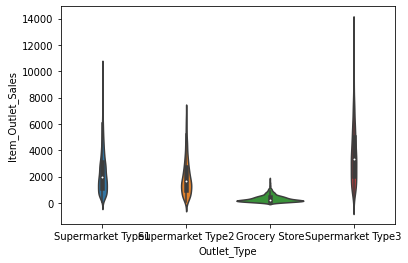

In [38]:
sns.violinplot('Outlet_Type','Item_Outlet_Sales',data = train)

### Observations

<ul><li>Tier 1 and Tier 3 locations of Outlet_Location_Type look similar.</li>
<li>In the Outlet_Type plot, Grocery Store has most of its data points around the lower sales values as compared to the other categories.</li></ul>


These are the kind of insights that we can extract by visualizing our data. Hence, data visualization should be an important part of any kind data analysis.




### Missing Data Treatment

Missing data can have a severe impact on building predictive models because the missing values might be contain some vital information which could help in making better predictions. So, it becomes imperative to carry out missing data imputation. There are different methods to treat missing values based on the problem and the data. Some of the common techniques are as follows:

In [39]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

### Imputing Missing Value
As you can see above, we have missing values in Item_Weight and Outlet_Size. We’ll now impute Item_Weight with mean weight.

In [40]:
from sklearn.preprocessing import LabelEncoder
l_enc  = LabelEncoder()
a = l_enc.fit_transform(train['Item_Identifier'])

In [41]:
a

array([ 156,    8,  662, ..., 1357,  681,   50])

In [42]:
train['Item_Weight'].fillna(a.mean(),inplace = True)

In [43]:
train.Item_Weight.isna().sum()

0

In [44]:
train['Outlet_Size'].fillna('Small',inplace  = True)

In [45]:
train['Outlet_Size'].isna().sum()

0

0 missing values! It means we have successfully imputed the missing data in the feature.

### Replacing 0’s in Item_Visibility variable


Similarly, zeroes in Item_Visibility variable can be replaced with Item_Visibility wise mean values. It can be visualized in the plot below.

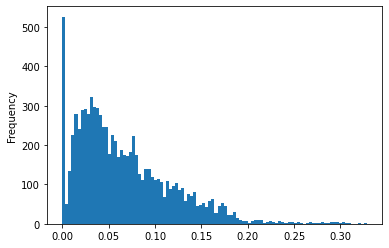

In [46]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

Let’s replace the zeroes.


In [47]:
train.shape

(8523, 13)

In [48]:
a= train[train['Item_Visibility']!=0]['Item_Visibility'].mean()

In [49]:
a

0.07048184085069402

In [50]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0.00,a)

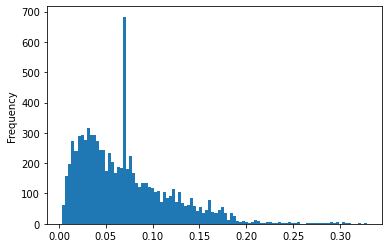

In [51]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

In [53]:
train["Item_Type"]

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
                ...          
8518              Snack Foods
8519             Baking Goods
8520       Health and Hygiene
8521              Snack Foods
8522              Soft Drinks
Name: Item_Type, Length: 8523, dtype: object

### Feature Engineering

Most of the times, the given features in a dataset are not sufficient to give satisfactory predictions. In such cases, we have to create new features which might help in improving the model’s performance. Let’s try to create some new features for our dataset.

In this section we will create the following new features:

<ul><li>Item_Type_new: Broader categories for the variable Item_Type.</li>
<li>Item_category: Categorical variable derived from Item_Identifier.</li>
<li>Outlet_Years: Years of operation for outlets.</li>
<li>price_per_unit_wt: Item_MRP/Item_Weight</li>
<li>Item_MRP_clusters: Binned feature for Item_MRP.</li></ul>


We can have a look at the Item_Type variable and classify the c
ategories into perishable and non_perishable as per our understanding and make it into a new feature.

In [52]:
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]

create a new feature 'Item_Type_new' 

In [54]:
item_list =[] 
for i in train['Item_Type']:
    if i in perishable:
        item_list.append('perishable')
    elif (i in non_perishable):
        item_list.append('non_perishable')
    else:
        item_list.append('not_sure')
        
train['Item_Type_new'] = item_list

In [55]:
train['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [56]:
train['Item_Category'] =train['Item_Identifier'].replace({'^DR[A-Z]*[0-9]*':'DR','^FD[A-Z]*[0-9]*':'FD','^NC[A-Z]*[0-9]*':'NC'},regex = True)

In [57]:
Food=pd.crosstab(train['Item_Type'],train['Item_Category'])
Food

Item_Category,DR,FD,NC
Item_Type,,,
Baking Goods,0,648,0
Breads,0,251,0
Breakfast,0,110,0
Canned,0,649,0
Dairy,140,542,0
Frozen Foods,0,856,0
Fruits and Vegetables,0,1232,0
Hard Drinks,214,0,0
Health and Hygiene,0,0,520


We will also change the values of Item_Fat_Content wherever Item_category is ‘NC’ because non-consumable items cannot have any fat content. We will also create a couple of more features — Outlet_Years (years of operation) and price_per_unit_wt (price per unit weight).

In [58]:
train['Item_Fat_Content'][(train['Item_Category']=='NC')]='Non Edible'

In [59]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non Edible'], dtype=object)

In [60]:
train['Outlet_Years'] = 2019-train['Outlet_Establishment_Year']

In [61]:
train['Outlet_Years']

0       20
1       10
2       20
3       21
4       32
        ..
8518    32
8519    17
8520    15
8521    10
8522    22
Name: Outlet_Years, Length: 8523, dtype: int64

In [62]:
train['Price_Per_Unit_Weight'] = train['Item_MRP']/train['Item_Weight']

Earlier in the Item_MRP vs Item_Outlet_Sales plot, we saw Item_MRP was spread across in 4 chunks. Now let’s assign a label to each of these chunks and use this label as a new variable.

In [63]:
def clusters(x):
    if x<69:
        return '1st'
    elif x in range(69,136):
        return '2nd'
    elif x in range(136,203):
        return '3rd'
    else:
        return '4th'
train['Item_MRP_Clusters'] = train['Item_MRP'].astype('int').apply(clusters)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_new,Item_Category,Outlet_Years,Price_Per_Unit_Weight,Item_MRP_Clusters
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,perishable,FD,20,26.861204,4th
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,non_perishable,DR,10,8.153581,1st
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,perishable,FD,20,8.092457,3rd
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,perishable,FD,21,9.484115,3rd
4,NCD19,8.93,Non Edible,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,non_perishable,NC,32,6.031512,1st


In [64]:
train['Item_MRP_Clusters'].unique()

array(['4th', '1st', '3rd', '2nd'], dtype=object)

### Encoding Categorical Variables

Most of the machine learning algorithms produce better result with numerical variables only. So, it is essential to treat the categorical variables present in the data. One thing that can be done is to completely remove the categorical variables, but that would lead to enormous loss of information. Fortunately we have smarter techniques to deal with the categorical variables.

In this stage, we will convert our categorical variables into numerical ones. We will use 2 techniques — Label Encoding and One Hot Encoding.

<ul><b>1). Label encoding </b>simply means converting each category in a variable to a number. It is more suitable for ordinal variables — categorical variables with some order.</ul>

<ul><b>2). In One hot encoding</b>, each category of a categorical variable is converted into a new binary column (1/0).</ul>



### Label encoding for the categorical variables

We will label encode Outlet_Size and Outlet_Location_Type as these are ordinal variables.

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
# a = ['Outlet_Size','Outlet_Location_Type']
le = LabelEncoder()
train['Outlet_Size']= le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Item_MRP_Clusters'] = le.fit_transform(train['Item_MRP_Clusters'])

### One hot encoding for the categorical variable

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     8523 non-null   object 
 13  Item_Type_new              8523 non-null   objec

In [79]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years,Price_Per_Unit_Weight,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
0,9.300,0,0.016047,249.8092,1999,1,0,3735.1380,20,26.861204,...,0,1,0,0,0,0,1,0,1,0
1,5.920,2,0.019278,48.2692,2009,1,2,443.4228,10,8.153581,...,0,0,1,0,1,0,0,1,0,0
2,17.500,0,0.016760,141.6180,1999,1,0,2097.2700,20,8.092457,...,0,1,0,0,0,0,1,0,1,0
3,19.200,2,0.070482,182.0950,1998,2,2,732.3800,21,9.484115,...,1,0,0,0,0,0,1,0,1,0
4,8.930,1,0.070482,53.8614,1987,0,2,994.7052,32,6.031512,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,0,2,2778.3834,32,31.248623,...,0,1,0,0,0,1,0,0,1,0
8519,8.380,2,0.046982,108.1570,2002,2,1,549.2850,17,12.906563,...,0,1,0,0,1,0,0,0,1,0
8520,10.600,1,0.035186,85.1224,2004,2,1,1193.1136,15,8.030415,...,0,1,0,0,1,0,0,0,0,1
8521,7.210,2,0.145221,103.1332,2009,1,2,1845.5976,10,14.304189,...,0,0,1,0,0,1,0,0,1,0


In [78]:
#train['Outlet_Identifier'].unique(),train['Item_Identifier'].unique(),train['Item_Type'].unique()
a = pd.get_dummies(train[['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category']])


KeyError: ignored

In [80]:
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category','source'],axis = 1 )
train = pd.concat([train,a],axis = 1)

KeyError: ignored

### PreProcessing Data

#### What is Data PreProcessing?


In simple words, pre-processing refers to the transformations applied to your data before feeding it to the algorithm. It invloves further cleaning of data, data transformation, data scaling and many more things.

For our data, we will deal with the skewness and scale the numerical variables

#### Removing Skewness

Skewness in variables is undesirable for predictive modeling. Some machine learning methods assume normally distributed data and a skewed variable can be transformed by taking its log, square root, or cube root so as to make its distribution as close to normal distribution as possible. In our data, variables Item_Visibility and price_per_unit_wt are highly skewed. So, we will treat their skewness with the help of log transformation.

In [81]:
train['Price_Per_Unit_Weight'] = np.log(train['Price_Per_Unit_Weight'])
train['Item_Visibility'] = np.log(train['Item_Visibility'])

#### Correlated Variables
Let’s examine the correlated features of train dataset. Correlation varies from -1 to 1.

<ul> 1). negative correlation: < 0 and >= -1 </ul>
<ul> 2). positive correlation: > 0 and <= 1</ul>
<ul> 3). no correlation: 0

In [82]:
corr = train.corr()
corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years,Price_Per_Unit_Weight,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
Item_Weight,1.000000,-0.003317,0.066080,-0.008383,-0.697827,-0.061976,0.092652,0.080829,0.697827,-0.931502,...,0.319613,-0.626303,-0.159086,0.771038,-0.016239,0.001699,0.015956,-0.014775,0.010002,-0.000490
Item_Fat_Content,-0.003317,1.000000,0.022764,0.008594,0.001451,-0.000829,0.000958,0.015249,-0.001451,0.007066,...,0.000742,-0.001443,0.001810,-0.000399,-0.039354,-0.012913,0.052585,-0.257054,0.116740,0.057458
Item_Visibility,0.066080,0.022764,1.000000,-0.001259,-0.051790,0.074313,-0.018024,-0.097821,0.051790,-0.061003,...,0.220199,-0.113338,-0.021623,-0.040640,-0.042096,-0.003787,0.048058,-0.000217,0.071544,-0.082243
Item_MRP,-0.008383,0.008594,-0.001259,1.000000,0.005020,0.000872,0.000232,0.567574,-0.005020,0.301232,...,-0.004277,0.004885,0.003850,-0.006714,-0.056826,0.028963,0.037030,-0.051733,0.029315,0.004859
Outlet_Establishment_Year,-0.697827,0.001451,-0.051790,0.005020,1.000000,0.425534,-0.089216,-0.049135,-1.000000,0.649372,...,-0.281196,0.245070,0.466336,-0.538072,0.011359,0.005425,-0.016566,0.009441,-0.002312,-0.004385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Item_Type_new_not_sure,0.001699,-0.012913,-0.003787,0.028963,0.005425,0.000402,-0.004614,0.018100,-0.005425,0.003193,...,-0.006228,0.002164,0.003768,-0.000412,-0.463202,1.000000,-0.322369,-0.149661,0.175873,-0.090831
Item_Type_new_perishable,0.015956,0.052585,0.048058,0.037030,-0.016566,-0.007977,0.002475,0.024315,0.016566,-0.007846,...,0.015642,-0.015081,-0.000764,0.007042,-0.689617,-0.322369,1.000000,-0.102429,0.355441,-0.332921
Item_Category_DR,-0.014775,-0.257054,-0.000217,-0.051733,0.009441,0.003876,-0.005539,-0.034672,-0.009441,0.004486,...,-0.003055,0.011999,-0.003872,-0.011145,0.210390,-0.149661,-0.102429,1.000000,-0.514021,-0.154560
Item_Category_FD,0.010002,0.116740,0.071544,0.029315,-0.002312,-0.003544,-0.001713,0.031905,0.002312,0.002912,...,-0.005712,-0.003772,0.003433,0.008406,-0.467322,0.175873,0.355441,-0.514021,1.000000,-0.768023


The correlation plot above shows correlation between all the possible pairs of variables in out data. The correlation between any two variables is represented with a number. a positive number represents positive correlation and negative number indicates negative correlation.

Variables price_per_unit_wt and Item_Weight are highly correlated as the former one was created from the latter. Similarly price_per_unit_wt and Item_MRP are highly correlated for the same reason.

### Model Building

Finally we have arrived at most interesting stage of the whole process — predictive modeling. We will start off with the simpler models and gradually move on to more sophisticated models. We will start with the simpler linear models and then move over to more complex models like RandomForest and XGBoost.

We will build the following models in the next sections.

<ul><li>Linear Regression</li></ul>
<ul><li>Lasso Regression</li></ul>
<ul><li>Ridge Regression</li></ul>
<ul><li>RandomForest</li></ul>
<ul><li>XGBoost</li></ul>

####  Evaluation Metrics for Regression

The process of model building is not complete without evaluation of model’s performance. That’s why we need an evaluation metric to evaluate our model. Since this is a regression problem, we can evaluate our models using any one of the following evaluation metrics:



<b>Mean Absolute Error (MAE)</b> is the mean of the absolute value of the errors:

![](https://miro.medium.com/max/390/1*8DXbECB9pnKxTpIvuVD-vg.png)

<b>Mean Squared Error (MSE)</b> is the mean of the squared errors:
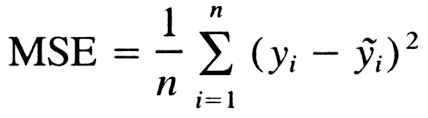

<b>Root Mean Squared Error (RMSE)</b> is the square root of the mean of the squared errors:
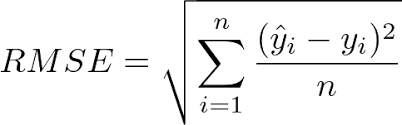

### Linear Regression

Linear regression is the simplest and most widely used statistical technique for predictive modeling. Given below is the linear regression equation:
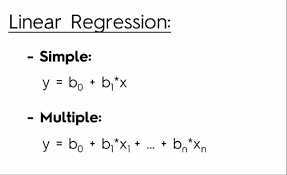

where X1, X2,…,Xn are the independent variables, Y is the target variable and all thetas are the coefficients. Magnitude of a coefficient wrt to the other coefficients determines the importance of the corresponding independent variable.

For a good linear regression model, the data should satisfy a few assumptions.

One of these assumptions is that of absence of multicollinearity, i.e, the independent variables should be correlated. However, as per the correlation plot above, we have a few highly correlated independent variables in our data. This issue of multicollinearity can be dealt with regularization.

For the time being, let’s build our linear regression model with all the variables. We will use 5-fold cross validationin all the models we are going to build. Basically cross vaidation gives an idea as to how well a model generalizes to unseen data.

#### Building Model

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
X = train.drop('Item_Outlet_Sales',axis = 1)
y = train['Item_Outlet_Sales']

### Train - Validation Split

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state = 8)

In [87]:
print(X_train.shape,X_valid.shape,y_train.shape,y_valid.shape)

(6392, 1605) (2131, 1605) (6392,) (2131,)


In [88]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Years,Price_Per_Unit_Weight,Item_MRP_Clusters,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
4325,13.00,0,-1.873283,79.6986,1997,2,0,22,1.813303,1,...,0,1,0,0,1,0,0,0,1,0
246,12.00,0,-3.382979,179.3976,1987,0,2,32,2.704698,2,...,0,1,0,0,1,0,0,0,1,0
22,14.60,1,-3.661337,196.5084,2004,2,1,15,2.599684,2,...,0,1,0,0,1,0,0,0,0,1
4612,15.50,2,-2.065209,262.1568,1998,2,2,21,2.828103,3,...,1,0,0,0,1,0,0,0,1,0
1894,15.35,0,-4.280608,62.7168,1999,1,0,20,1.407514,0,...,0,1,0,0,1,0,0,0,1,0


In [89]:
model = LinearRegression(normalize=True,fit_intercept= True)

In [90]:
model.fit(X,y)

LinearRegression(normalize=True)

In [93]:
y_pred = model.predict(X_valid)

In [94]:
model.score(X_train,y_train),model.score(X_valid,y_valid)

(0.5951568007914028, 0.6158938637798723)

In [92]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [95]:
mean_squared_error(y_valid, y_pred),mean_absolute_error(y_valid, y_pred)

(1231393.67337409, 853.6673335523228)

### XGBOOST REGRESSOR

In [96]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train,y_train)
predictions = my_model.predict(X_valid)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_valid,predictions)))

[12:42:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error : 795.3185603483576


### LASSO REGRSSOR

In [97]:
from sklearn.linear_model import Lasso

In [98]:
ls = Lasso(alpha = 0.01)
ls.fit(X_train,y_train)


Lasso(alpha=0.01)

In [99]:
predictions = ls.predict(X_valid)

In [100]:
mean_absolute_error(y_valid,predictions)

988.721047949262